06_store_member.csv 파일을, df_member로, 06_store_product.csv를 df_product로 선언
하여 아래의 문제를 해결해보세요.
## 1
#### **df_product데이터의 구조와 타입을 확인**


In [94]:
import pandas as pd
df_member=pd.read_csv("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/06_store_member.csv")
df_product=pd.read_csv("C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/06_store_product.csv")

In [2]:
df_member.head()

,회원번호,회원상태,성별,결혼유무,주소,생년,연령
0,2101,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46
3,2104,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49
4,2105,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70


In [3]:
df_product.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호
0,20170201,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0
1,20170201,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0
2,20170201,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0
3,20170201,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0
4,20170201,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0


In [6]:
print('데이터의 구조:',df_product.shape)
df_product.info()

데이터의 구조: (735783, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735783 entries, 0 to 735782
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      735783 non-null  int64  
 1   물품코드      735783 non-null  int64  
 2   물품대분류     735783 non-null  object 
 3   물품중분류     735783 non-null  object 
 4   물품소분류     735783 non-null  object 
 5   물품명       735783 non-null  object 
 6   구매수량      735783 non-null  float64
 7   구매금액      735783 non-null  int64  
 8   구매매장      735783 non-null  object 
 9   반품_원거래일자  10337 non-null   float64
 10  회원번호      735761 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 61.7+ MB


## 2. 
#### **df_product데이터의'물품대분류' 중 가장 많이 판매되는(수량)3가지 항목을 확인**

In [10]:
df_product['물품대분류'].value_counts(ascending=False)[:3]

물품대분류
채소     193170
축산물    134486
간식     111411
Name: count, dtype: int64

In [24]:
df_product['물품대분류'].value_counts(ascending=False)[:3].index

Index(['채소', '축산물', '간식'], dtype='object', name='물품대분류')

## 3. 
#### **앞서 확인한 3가지 항목을 추출하여, df_product_top이라는 변수로 선언하고,df_product_top에서 '구매매장'별 '구매금액'의 합과 평균을 계산**

In [27]:
top3_pd=df_product['물품대분류'].value_counts(ascending=False)[:3].index
# 이때 리스트 값을 | 연산자로 변환
df_product_top=df_product[df_product['물품대분류'].str.contains('|'.join(top3_pd))]

In [29]:
df_product_top['물품대분류'].value_counts()

물품대분류
채소     193170
축산물    134486
간식     111411
Name: count, dtype: int64

In [32]:
df_product_top.groupby('구매매장')['구매금액'].agg(['sum','mean'])

,sum,mean
구매매장,,
매장1,363985400,4770.638426
매장2,461745602,4908.271082
매장3,916748142,4949.910326
매장4,419048570,5019.146844


## 4. 
#### **'공급일자'데이터를 날짜형식으로 변환하여, '연도' / '월' / '요일' 항목을 새로운 파생변수로 생성 ( pd.to_datetime( ~ , format="%Y%m%d") )**

In [35]:
df_product['공급일자']=pd.to_datetime(df_product['공급일자'],format="%Y%m%d")
df_product['공급일자'].head()

0   2017-02-01
1   2017-02-01
2   2017-02-01
3   2017-02-01
4   2017-02-01
Name: 공급일자, dtype: datetime64[ns]

In [56]:
df_product['공급일자'].dt.weekday

0         2
1         2
2         2
3         2
4         2
         ..
735778    4
735779    4
735780    4
735781    4
735782    4
Name: 공급일자, Length: 735783, dtype: int32

In [65]:
import datetime
df_product['공급연도']=df_product['공급일자'].dt.strftime('%Y')
df_product['공급월']=df_product['공급일자'].dt.strftime('%m')
weeklist=['월','화','수','목','금','토','일']
df_product['공급요일']=df_product['공급일자'].dt.weekday
df_product['공급요일'] = df_product['공급요일'].apply(lambda x: weeklist[x])

In [49]:
df_product.head()

,공급일자,물품코드,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,반품_원거래일자,회원번호,공급연도,공급월
0,2017-02-01,50142001,채소,잎/줄기채소,시금치,시금치(300g),1.0,2000,매장3,NaN,2101.0,2017,02
1,2017-02-01,60302012,축산물,육가공,돈가스/분쇄가공,튀김옷돈가스(400g),1.0,6300,매장3,NaN,2101.0,2017,02
2,2017-02-01,80301002,간식,밀가공,라면,감자라면(110g:1봉),2.0,2600,매장3,NaN,2101.0,2017,02
3,2017-02-01,80301010,간식,밀가공,라면,사리면(100g),1.0,900,매장3,NaN,2101.0,2017,02
4,2017-02-01,80305003,간식,밀가공,만두,고기만두(500g),1.0,5400,매장3,NaN,2101.0,2017,02


## 5. 
#### **'월'에 따른'물품대분류'별 '구매금액'의 합을 게산하여 result8.xlsx저장**

In [68]:
# 월에 따른 물품대분류별 구매금액의 합 계산
df_product.groupby(['공급월','물품대분류'])['구매금액'].sum()

공급월  물품대분류
01   간식        83859470
     건강        35891780
     과실        59004590
     반찬        51215050
     베이커리          4800
                ...    
06   잡곡         9861120
     주곡        23827320
     주류         1251030
     채소       120914240
     축산물      185366000
Name: 구매금액, Length: 91, dtype: int64

## 6. 
#### **'요일'에서 '주말'과'주중'을 구분하여,'주중과 주말의 구매금액의 평균의 차이가 있는지 가설검정을 수행**

In [74]:
df_product_wO=df_product[df_product['공급요일'].str.contains('토','일')]
df_product_wX=df_product[~df_product['공급요일'].str.contains('토','일')]

In [83]:
import scipy.stats as stats
# 두 집단의 구매금액의 분포가 정규성을 따르는 지 확인
# h0: dt_product_wO(주말) 구매금액의 분포가 정규성을 따름
stats.normaltest(df_product_wO['구매금액'])

NormaltestResult(statistic=np.float64(168413.50475499927), pvalue=np.float64(0.0))

In [82]:
# h0: dt_product_wX(주중) 구매금액의 분포가 정규성을 따름
stats.normaltest(df_product_wX['구매금액'])

NormaltestResult(statistic=np.float64(1471705.2100262211), pvalue=np.float64(0.0))

In [85]:
print(df_product_wO.shape[0])
print(df_product_wX.shape[0])

97035
638748


- 이때 둘다 pvalue 0이므로 두 데이터의 구매금액 모두 정규분포를 따르지 않음
- 두 집단의 연속형 변수를 검증할 때 사용되는 두가지 비모수 테스트
1. Mann-Whitney U test
2. Wilicoxon test
- Wilicoxon 검정은 두개의 관련 또는 쌍 표본을 비교하는데 사용되는 반면 Mann-Whitney U 검정은 두개의 독립적인 표본을 비교하는데 사용함
> 예시) Wilicoxon 검정은 어떤 실험의 사전/사후 집단에서 유의성이 있는지 확인, Mann-Whitney U 검정은 남/녀의 차이가 있는지 확인  
-  Mann-Whitney U 검정은 표본 크기 (n>30)에 더 적합한 반면 Wilicoxon 검정은 더 작은 표본에서 검정력이 높음

***결론) 두 집단이 관련되지 않은 표본이고 또한 두 집단의 표본 크기가 크기 때문에 Mann-Whitney U test 진행***

In [86]:
# h0: 두 집단의 구매금액의 평균의 차이가 있음
stats.mannwhitneyu(df_product_wO['구매금액'],df_product_wX['구매금액'])

MannwhitneyuResult(statistic=np.float64(31035022609.0), pvalue=np.float64(0.4696789692361416))

이때 pvalue>유의수준 a(0.05)에서 h0 accept.

따라서 두 집단의 구매금액의 평균에 차이가 없음

## 7. 
#### **df_product데이터에서 '회원번호' 별 '구매금액'과 '구매수량'의 합을 계산하여, df_member 데이터에 병합해, df1 변수로 선언하시오.**


In [90]:
df_product2=df_product.groupby(['회원번호'])[['구매금액','구매수량']].sum()

In [149]:
# how='inner' 옵션으로 더 작은 데이터프레임에 맞추기
df1=pd.merge(df_product2,df_member,how='inner',on='회원번호')

In [150]:
df1.head()

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령
0,2101.0,1991230,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51
1,2102.0,2095860,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71
2,2103.0,8273550,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46
3,2104.0,6289495,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49
4,2105.0,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70


In [151]:
# 두 데이터가 잘 merge 되었는지 확인
print(df_product2.shape)
print(df_member.shape)
print(df1.shape)

(4285, 2)
(4396, 7)
(4285, 9)


## 8
#### **df1 데이터에서 '연령'데이터를 이용해 '연령대_new'라는 항목 파생변수로 생성 (if문을 쓰지 않고 생성)**

In [152]:
print(df1['연령'].min())
print(df1['연령'].max())

23
107


In [153]:
# 디폴트 값 0으로 파생변수 생성
df1['연령대_new']=0
df1.loc[df1['연령']<110,'연령대_new']=100
df1.loc[df1['연령']<100,'연령대_new']=90
df1.loc[df1['연령']<90,'연령대_new']=80
df1.loc[df1['연령']<80,'연령대_new']=70
df1.loc[df1['연령']<70,'연령대_new']=60
df1.loc[df1['연령']<60,'연령대_new']=50
df1.loc[df1['연령']<50,'연령대_new']=40
df1.loc[df1['연령']<40,'연령대_new']=30
df1.loc[df1['연령']<30,'연령대_new']=20

In [154]:
df1[['연령','연령대_new']].head()

,연령,연령대_new
0,51,50
1,71,70
2,46,40
3,49,40
4,70,70


In [155]:
df1['연령대_new'].value_counts()

연령대_new
40     1326
50      919
30      882
60      676
70      368
80       74
20       34
90        4
100       2
Name: count, dtype: int64

## 9. 
#### **df1 데이터에서 '결혼유무'에서 '기혼'에 해당하는 고객들 중 '방문횟수'가 높은 상위 30명의 고객명단을 확인**

In [156]:
# df_product 데이터에서 방문횟수 변수 생성
visits=df_product.groupby('회원번호').size().reset_index(name='방문횟수')
visits.head()

,회원번호,방문횟수
0,2101.0,342
1,2102.0,409
2,2103.0,1598
3,2104.0,1180
4,2105.0,512


In [157]:
# df1 과 결함
df1=pd.merge(df1,visits,how='inner',on='회원번호')
df1.head()

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령,연령대_new,방문횟수
0,2101.0,1991230,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,50,342
1,2102.0,2095860,472.5,정상회원,여,NaN,경기 용인시 수지구 동천동,1947,71,70,409
2,2103.0,8273550,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,40,1598
3,2104.0,6289495,1401.8,정상회원,여,NaN,경기 용인시 수지구 성복동,1969,49,40,1180
4,2105.0,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,70,512


In [158]:
# 결혼유무 null 값 확인
df1['결혼유무'].isna().sum()

np.int64(925)

In [159]:
# df1의 결혼유무가 null인 값을 모두 미혼으로 설정
df1['결혼유무']=df1['결혼유무'].fillna('미혼')

In [172]:
# 결혼 유무에서 기혼에 해당하는 고객들 중 방문횟수가 높은 상위 30명 고객 명단 확인
df1[df1['결혼유무']=='기혼'].nlargest(30,'방문횟수')

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령,연령대_new,방문횟수
156,2277.0,21950630,4425.70,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,1971,47,40,3806
3645,5856.0,21217470,4006.96,탈퇴,여,기혼,경기 용인시 수지구 신봉동,1972,46,40,3756
142,2260.0,18681595,3870.15,정상회원,여,기혼,경기 용인시 수지구 풍덕천동,1977,41,40,3514
2857,5068.0,21285710,4180.50,탈퇴,여,기혼,경기 용인시 수지구 동천동,1971,47,40,3462
479,2637.0,19646542,3566.35,탈퇴,남,기혼,서울 중구 장충동1가 31-,1983,35,30,2977
2441,4649.0,16471290,3447.20,탈퇴,여,기혼,경기 용인시 수지구 풍덕천2,1972,46,40,2896
1928,4135.0,18381620,3219.43,탈퇴,여,기혼,경기 용인시 수지구 신봉동,1969,49,40,2768
103,2214.0,14895300,2986.40,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,1976,42,40,2762
39,2141.0,15302800,2896.70,정상회원,여,기혼,경기 용인시 수지구 풍덕천2,1968,50,50,2644
372,2521.0,13609730,2985.55,정상회원,여,기혼,경기 용인시 수지구 신봉동,1974,44,40,2497


## 10
#### **df1 데이터에서, '구매금액'의 합이 가장 높은 2개의 '연령대_new'를 확인하여, 두 연령대간의 '구매금액'의 평균의 차이가 있는지 가설검정을 수행**

In [175]:
# 구매금액의 합이 가장 높은 2개의 연령대_new 확인
df1.groupby('연령대_new')['구매금액'].sum().sort_values(ascending=False)[:2]

연령대_new
40    1679359996
50     984225059
Name: 구매금액, dtype: int64

In [176]:
# 두 연령대 (40대, 50대) 데이터 각각 생성
df1_40=df1[df1['연령대_new']==40]
df1_50=df1[df1['연령대_new']==50]

In [177]:
# 두 연령대의 구매금액의 분포가 정규성을 따르는지 확인
# h0: 40대의 구매금액의 분포가 정규성을 따름
stats.normaltest(df1_40['구매금액'])

NormaltestResult(statistic=np.float64(1057.5880494292712), pvalue=np.float64(2.2267579064575226e-230))

In [179]:
# h0: 50대의 구매금액의 분포가 정규성을 따름
stats.normaltest(df1_50['구매금액'])

NormaltestResult(statistic=np.float64(651.4052688314714), pvalue=np.float64(3.541140284058096e-142))

In [181]:
# 유의수준 0.05에서 두 귀무가설 모두 reject
# 두 집단의 구매금액이 정규성을 따르지 않으므로 Mann Whitney U 검정 수행
# h0: 두 집단의 구매금액의 평균의 차이가 없음
stats.mannwhitneyu(df1_40['구매금액'],df1_50['구매금액'])

MannwhitneyuResult(statistic=np.float64(588357.5), pvalue=np.float64(0.1656017021193642))

- 따라서 유의수준 0.05에서 h0 accpet
- 두 집단의 구매금액의 평균에 차이가 없음

## 11
#### **df1 데이터에서 '성별'에 따른 '총구매금액'의 평균을 시각화**

<Axes: xlabel='성별', ylabel='구매금액'>

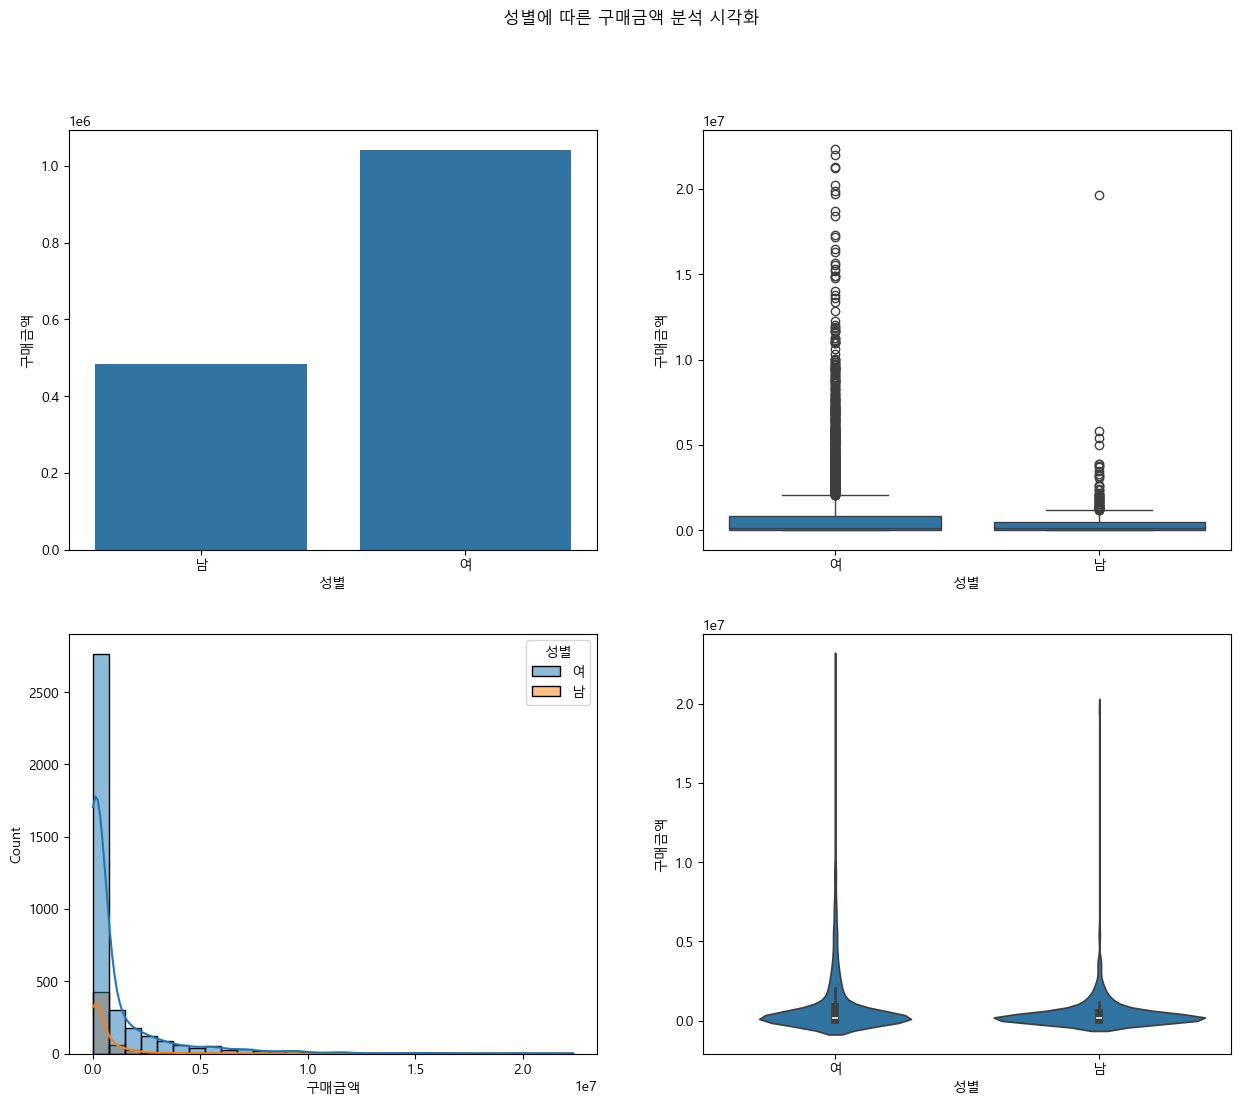

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
# 4개의 그래프 한번에 보여주기
fig,axes=plt.subplots(2,2,figsize=(15,12))
fig.suptitle('성별에 따른 구매금액 분석 시각화')
# 1 막대그래프로 시각화
# 성별에 따른 총구매금액 평균 계산
avg_purchase = df1.groupby('성별')['구매금액'].mean().reset_index()
# 막대 그래프 시각화
sns.barplot(x='성별', y='구매금액', data=avg_purchase,ax=axes[0,0])

# 2 박스 그래프로 시각화
sns.boxplot(x='성별', y='구매금액', data=df1, ax=axes[0, 1])

# 3 히스토그램 시각화
sns.histplot(data=df1, x='구매금액', hue='성별', kde=True, bins=30, ax=axes[1, 0])

# 4 바이올린 플랏으로 시각화
sns.violinplot(x='성별', y='구매금액', data=df1, ax=axes[1, 1])

## 12
#### **'1회방문구매평균'을 바탕으로 고객등급을 분류하고자 한다. 10만원 이상 고객은 A / 5만원 이상은 B / 2만원 이상 C / 나머지는 D 등급으로 분류하여, '고객등급'이라는 새로운 항목을 생성**

In [192]:
df1.head()

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령,연령대_new,방문횟수
0,2101.0,1991230,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,50,342
1,2102.0,2095860,472.5,정상회원,여,미혼,경기 용인시 수지구 동천동,1947,71,70,409
2,2103.0,8273550,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,40,1598
3,2104.0,6289495,1401.8,정상회원,여,미혼,경기 용인시 수지구 성복동,1969,49,40,1180
4,2105.0,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,70,512


In [195]:
# 1회방문구매평균 변수 생성
# 이때 소숫점 셋째자리에서 반올림
df1['1회방문구매평균']=round(df1['구매금액']/df1['방문횟수'],2)
df1.head()

,회원번호,구매금액,구매수량,회원상태,성별,결혼유무,주소,생년,연령,연령대_new,방문횟수,1회방문구매평균
0,2101.0,1991230,382.0,정상회원,여,기혼,서울 강북구 미아동 134-,1967,51,50,342,5822.31
1,2102.0,2095860,472.5,정상회원,여,미혼,경기 용인시 수지구 동천동,1947,71,70,409,5124.35
2,2103.0,8273550,1675.4,정상회원,여,기혼,경기 용인시 수지구 동천동,1972,46,40,1598,5177.44
3,2104.0,6289495,1401.8,정상회원,여,미혼,경기 용인시 수지구 성복동,1969,49,40,1180,5330.08
4,2105.0,3067930,602.0,정상회원,여,기혼,경기 용인시 수지구 동천동,1948,70,70,512,5992.05


In [197]:
# 고객등급 변수 생성
# 구간 설정
bins = [0, 20000, 50000, 100000, float('inf')] 
# 구간에 대한 레이블 설정
labels = ['D', 'C', 'B', 'A'] 
# 이때 right=False로 구간의 오른쪽 경계를 포함하지 않도록 설정
df1['고객등급'] = pd.cut(df1['1회방문구매평균'], bins=bins, labels=labels, right=False)
# 결과 확인
df1[['1회방문구매평균', '고객등급']].tail()

,1회방문구매평균,고객등급
4280,5727.78,D
4281,7500.00,D
4282,6166.67,D
4283,5300.00,D
4284,9888.57,D


In [198]:
df1['고객등급'].value_counts()

고객등급
D    4160
C     111
B       8
A       6
Name: count, dtype: int64

## 13. 
#### **'고객등급'을 입력했을 때, 해당 고객등급에서 '성별'에 따른 '총구매금액' 기술통계량을계산하여 'result9_등급명.xlsx'저장하는 프로그램을 구성**


In [210]:
def my_func():
    # 고객 등급 입력
    ans=input('고객등급을 입력하세요')
    # 입력한 등급의 고객 데이터 추출
    df1_ans=df1[df1['고객등급']==ans]
    # 성별에 따른 총구매금액의 기술통계량 계산
    df1_ans=df1_ans.groupby('성별')['구매금액'].describe()
    # 엑셀에 저장
    df1_ans.to_excel('C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result9_{}.xlsx'.format(ans))

In [207]:
my_func()

고객등급을 입력하세요 C


In [209]:
# 결과 확인
pd.read_excel('C:/Users/sshyu/OneDrive/바탕 화면/DSA_13기/result9_C.xlsx')

,성별,count,mean,std,min,25%,50%,75%,max
0,남,22,126806.818182,155316.561757,22000,38400,72600,142075,702800
1,여,89,95083.820225,139877.762923,20000,26500,43300,88000,1077750
